In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리
import numpy as np

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [39]:
# 파일의 상대 경로 지정
meta_filepath = './hs_meta.csv'

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드 출력
meta_data.head()

,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,56.8,6.8,19000
1,죽음의 기사,부정 죽음의 기사,40.7,3.8,10000
2,죽음의 기사,혈기 죽음의 기사,48.0,3.3,9100
3,죽음의 기사,냉기 죽음의 기사,45.7,1.2,3200
4,죽음의 기사,Rainbow Death Knight,51.2,0.6,1600


In [52]:
# 직업별 색깔 지정
hero_color = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

In [42]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

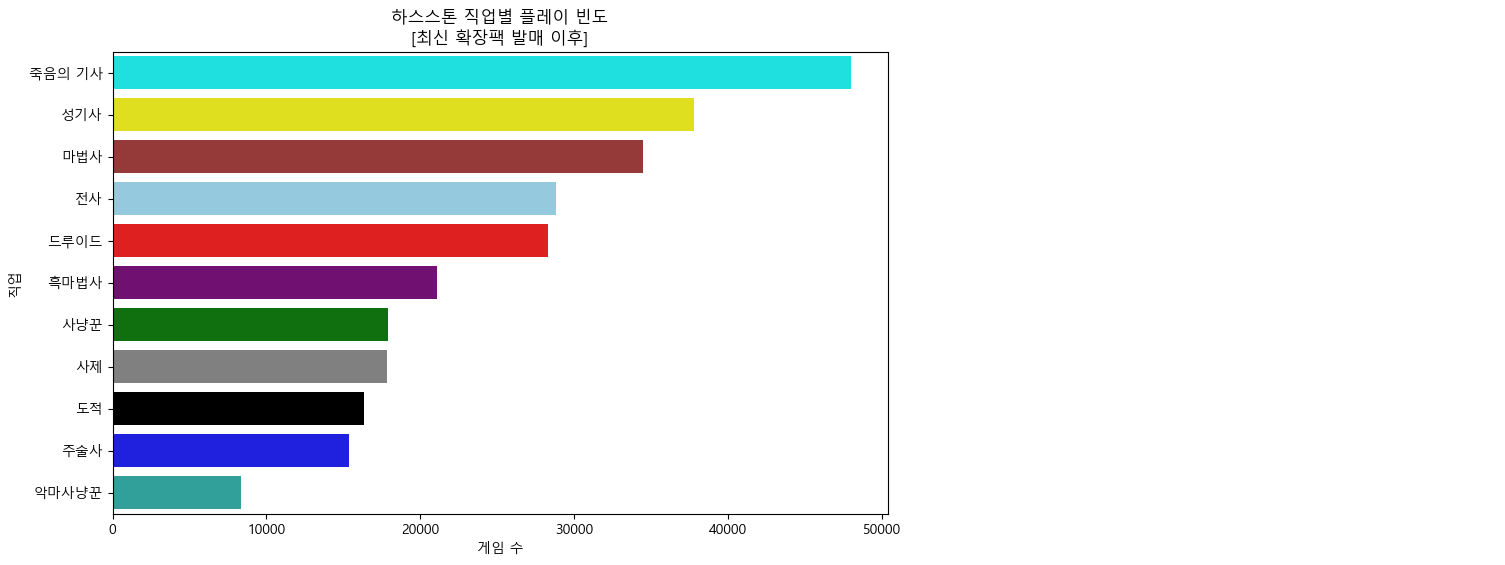

In [40]:
# 직업별 게임 플레이 빈도 계산
hero_total = meta_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()

# 게임 수가 많은 순으로 정렬
hero_total = hero_total.sort_values(by='Games', ascending=False)

# Seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(10, 6))
hero_graph = sns.barplot(x='Games', y='Hero', data=hero_total, palette=hero_color.values())
plt.title("하스스톤 직업별 플레이 빈도\n[최신 확장팩 발매 이후]")
plt.xlabel("게임 수")
plt.ylabel("직업")

# 각 막대 안에 점유율을 표시
for index, value in enumerate(hero_total['Popular']):
    hero_graph.text(value * 5000, index, f'{value:.1f}%', va='center', fontsize=10, color='white')
plt.show()


In [41]:
# 직업별 총 점유율 계산
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index()

# 총 점유율이 큰 순서로 직업 정렬
hero_popular_total = hero_popular_total.sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 hero 열을 categorical 변수로 변환
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱' 수정
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 결과 확인
deck_total.head()

,Hero,Deck,Winrate,Popular,Games
7,악마사냥꾼,어그로 악마사냥꾼,55.9,1.9,5400
8,악마사냥꾼,빅 악마사냥꾼,39.5,0.4,1000
11,악마사냥꾼,기타 악마사냥꾼,22.8,0.4,1100
9,악마사냥꾼,유물 악마사냥꾼,36.0,0.2,430
10,악마사냥꾼,하이랜더 악마사냥꾼,42.1,0.2,420


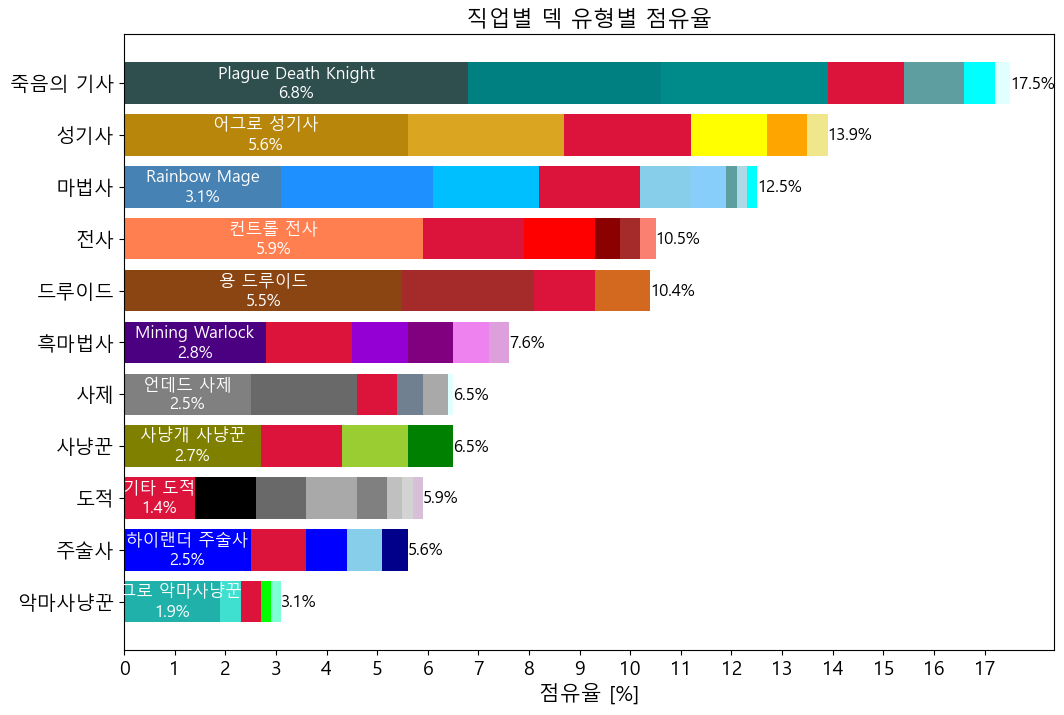

In [43]:
# 직업별로 덱 유형의 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# Seaborn을 사용하여 누적 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

#직업별 가장 높은 점유율을 가진 덱 정보 가져오기
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center', fontsize=12)

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center', fontsize=12)

# 축 설정
plt.title("직업별 덱 유형별 점유율", fontsize=16)
plt.xticks(range(0, 18), fontsize=14)
plt.xlabel("점유율 [%]", fontsize =15)
plt.yticks(fontsize=14)

# 범례 끄기
plt.legend().set_visible(False)

plt.show()

In [44]:
# 파일의 상대 경로 지정
matchup_filepath = './hs_matchups.csv'

# 데이터 불러오기
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환, 에러가 발생하면 NaN 반환
    try:
        return float(value.rstrip('%'))
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)
matchup_data.head()

,Plague Death Knight,컨트롤 전사,어그로 성기사,용 드루이드,부정 죽음의 기사,혈기 죽음의 기사,Showdown Paladin,Rainbow Mage,Mining Mage,Mining Warlock,사냥개 사냥꾼,하이랜더 드루이드,하이랜더 주술사,Unnamed: 14
Plague Death Knight,NaN,55.32,39.50,43.67,64.53,58.24,43.25,47.66,49.06,51.06,43.01,52.87,57.86,70.05
컨트롤 전사,44.67,NaN,36.73,46.03,66.04,64.30,41.43,51.45,47.18,38.59,44.89,39.77,47.20,62.09
어그로 성기사,60.49,63.26,NaN,65.98,62.31,65.41,39.18,50.56,57.74,56.95,69.64,70.17,56.03,72.69
용 드루이드,56.32,53.96,34.01,NaN,77.77,62.23,32.73,51.65,64.40,62.77,58.06,50.32,45.25,65.28
부정 죽음의 기사,35.46,33.95,37.68,22.22,NaN,38.43,29.71,29.96,38.87,36.36,25.26,32.70,20.86,53.62


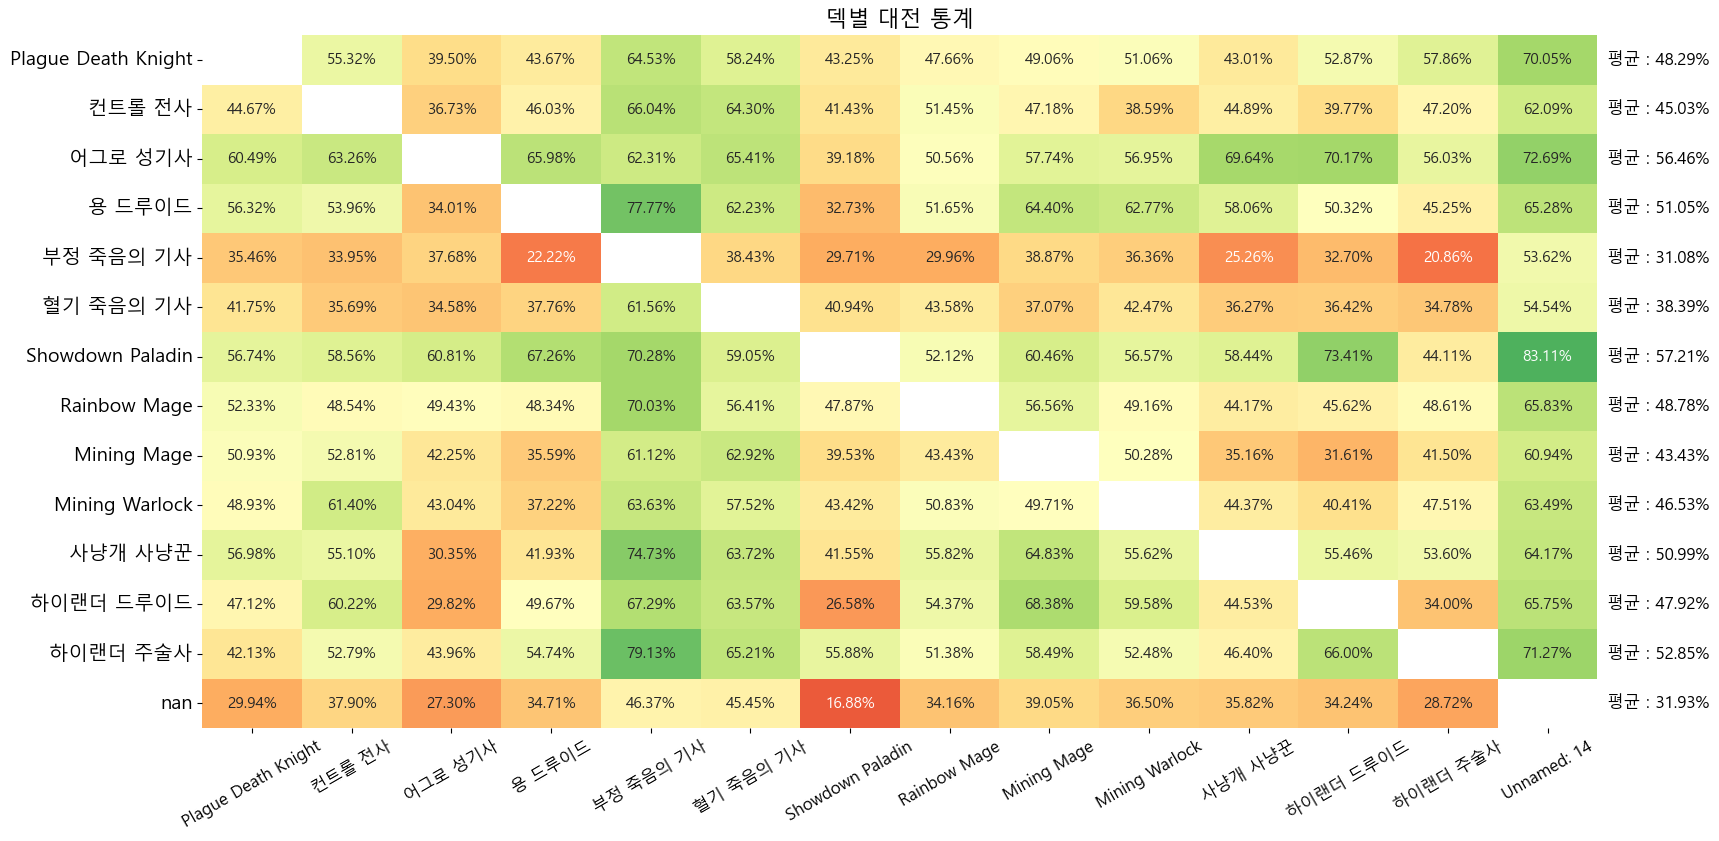

In [45]:
# 셀의 크기 조절
plt.figure(figsize=(18, 9)) 

# 히트맵 생성
heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 11}, cbar=False)

# 행별 열의 합의 평균값을 행의 오른쪽에 표시
for i, row_name in enumerate(matchup_data.index):
    row_sum = matchup_data.loc[row_name].sum()
    avg_value = row_sum / len(matchup_data.columns)
    heatmap.text(len(matchup_data.columns)+0.1, i + 0.5, f'평균 : {avg_value:.2f}', ha='left', va='center', fontsize=12, color='black')

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

plt.title("덱별 대전 통계", fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=14)
plt.show()


In [46]:
# 데이터 불러오기 및 처리하는 함수
def load_and_process_data(file_path):
    # 메타 데이터 불러오기 : usecols - 해당 열을 선택
    data = pd.read_csv(file_path, usecols=['Hero', 'Winrate', 'Popular', 'Games'])

    # 열의 데이터들을 숫자로 변환
    data['Winrate'] = pd.to_numeric(data['Winrate'].str.rstrip('%'), errors='coerce')
    data['Popular'] = pd.to_numeric(data['Popular'].str.rstrip('%'), errors='coerce')
    data['Games'] = pd.to_numeric(data['Games'].str.replace(',', ''), errors='coerce')
    
    # 직업을 기준으로 그룹화하고 각 그룹의 열들의 값을 합산
    grouped_data = data.groupby('Hero').sum().reset_index()
    
    # Popular 열을 기준으로 내림차순으로 정렬
    sorted_data = grouped_data.sort_values(by='Popular', ascending=False)
    
    return sorted_data

# 파이 차트를 그리는 함수
def draw_pie_chart(ax, server_total, title, colors, wedgeprops, explode):
    # ax : 서브플롯(axex) 객체로, 그래프가 그려질 위치를 나타냄
    ax.pie(
        server_total['Games'],
        labels=server_total['Hero'],
        autopct=lambda p: f'{p:.2f}%' if p > 0 else '',
        explode=explode,
        colors=colors,
        wedgeprops=wedgeprops,
        startangle=0,
        shadow=True,
        textprops={'color': 'black'}
    )
    ax.set_title(title)

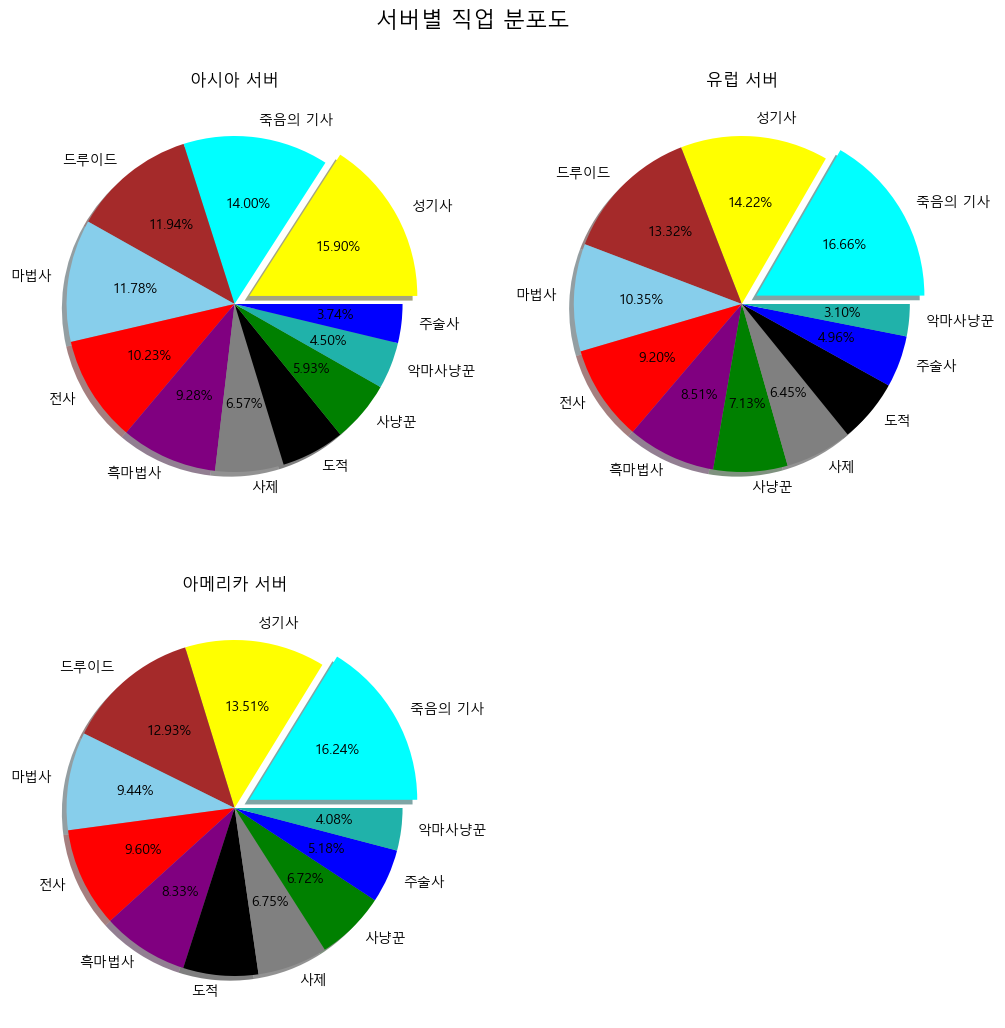

In [47]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
filepaths = {
    'ap': os.path.join(current_directory, 'all', './hs_meta-AP.csv'),
    'eu': os.path.join(current_directory, 'all', './hs_meta-EU.csv'),
    'us': os.path.join(current_directory, 'all', './hs_meta-US.csv'),
}

# 서버별 데이터 합치기
ap_total = load_and_process_data(filepaths['ap'])
eu_total = load_and_process_data(filepaths['eu'])
us_total = load_and_process_data(filepaths['us'])

# 파이 차트 설정
wedgeprops = {'width': 1, 'edgecolor': 'k', 'linewidth': 0}  # 부채꼴 스타일
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # 중심 벗어나는 정도

# 서버별 데이터 합치기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))  # 2행 2열로 배열

# 서버 정보 설정
servers = [('아시아', ap_total, '아시아'), ('유럽', eu_total, '유럽'), ('아메리카', us_total, '아메리카')]

# 파이 차트 그리기
for i, (server, server_total, title) in enumerate(servers):
    colors = server_total['Hero'].map(hero_color)
    draw_pie_chart(axes[i // 2, i % 2], server_total, f'{server} 서버', colors, wedgeprops, explode)

# 빈 서브플롯
axes[1, 1].axis('off')

# 전체 제목 추가
fig.suptitle("서버별 직업 분포도", y=0.95, fontsize=16)

# 그래프 출력
plt.show()

In [51]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일명과 날짜 매핑
file_date_mapping = {
    'day24': '24',
    'day25': '25',
    'day26': '26',
    'day27': '27',
    'day28': '28',
}

# 데이터프레임을 저장할 리스트
data_frames = []

# 파일 불러오기 및 데이터 가공
for file_name, date in file_date_mapping.items():
    file_path = os.path.join(current_directory, 'day', f'./hs_meta_{date}.csv')
    data = pd.read_csv(file_path)

    # 열의 데이터들을 숫자로 변환
    data['Winrate'] = data['Winrate'].str.rstrip('%').astype('float')
    data['Popular'] = data['Popular'].str.rstrip('%').astype('float')
    data['Games'] = data['Games'].str.replace(',', '').astype('int')

    # 'Day' 열 추가
    data['Day'] = date

    # 리스트에 데이터프레임 추가
    data_frames.append(data)


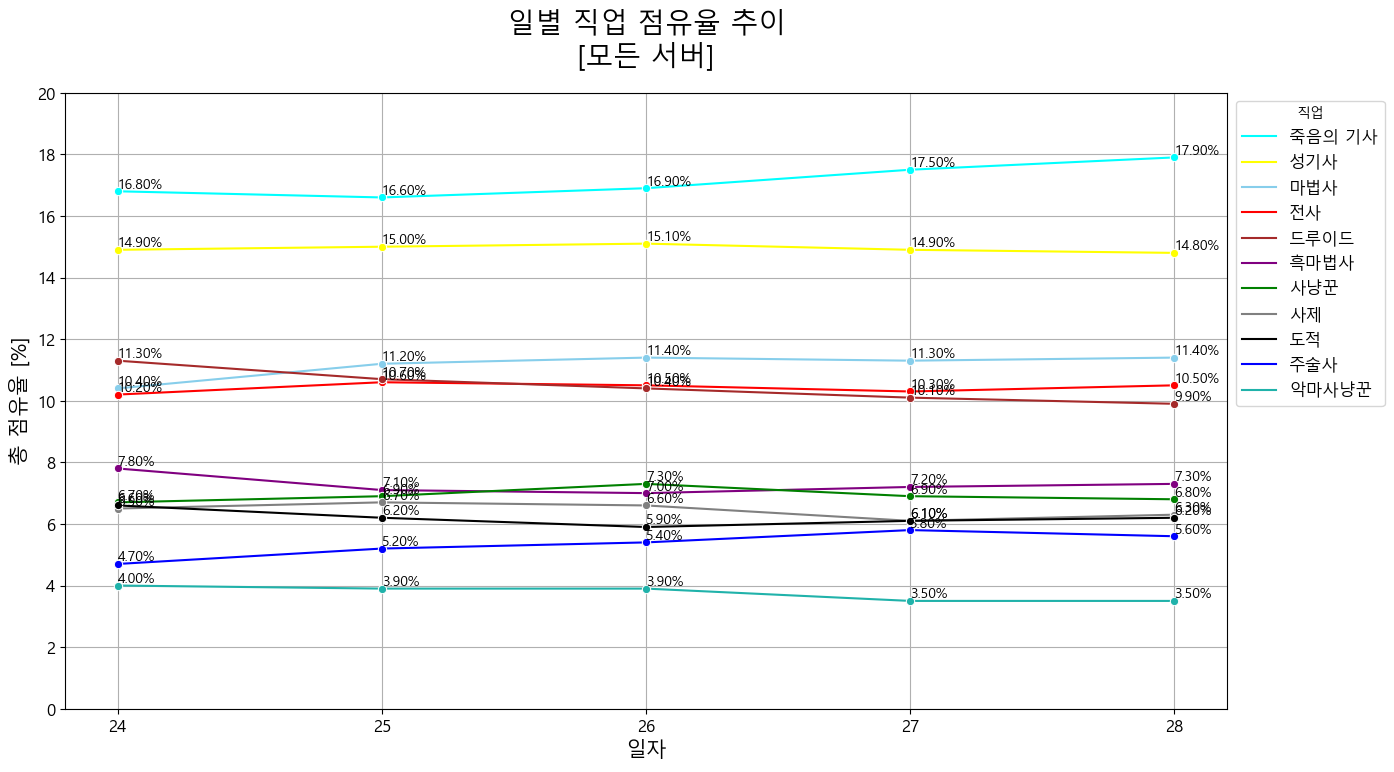

In [54]:
# 모든 데이터프레임을 하나로 합치기
all_days_data = pd.concat(data_frames, ignore_index=True)

# 날짜 및 직업별 Popular 합 구하기
daily_popular_by_hero = all_days_data.groupby(['Day', 'Hero'])[['Popular']].sum().reset_index()

# 직업별 마지막 날짜 (28일)의 Popular 값에 따라 정렬
sorted_heroes = daily_popular_by_hero[daily_popular_by_hero['Day'] == '28'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(data=daily_popular_by_hero, x='Day', y='Popular', hue='Hero', marker='o', palette=hero_color, hue_order=sorted_heroes)

# 각 직업별 총 점유율 값을 선에 표시
for index, row in daily_popular_by_hero.iterrows():
    plt.text(row['Day'], row['Popular'], f"{row['Popular']:.2f}%", color='black', fontsize=10, ha='left', va='bottom')

# 타이틀 및 레이블, 범례 설정
plt.title('일별 직업 점유율 추이\n[모든 서버]', pad=20, fontsize=20)
plt.xlabel('일자', fontsize=15)
plt.ylabel('총 점유율 [%]', fontsize=15)
plt.legend(title='직업', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# 축 설정
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 21, 2), fontsize=12)
plt.grid(True)

# 그래프 출력
plt.show()

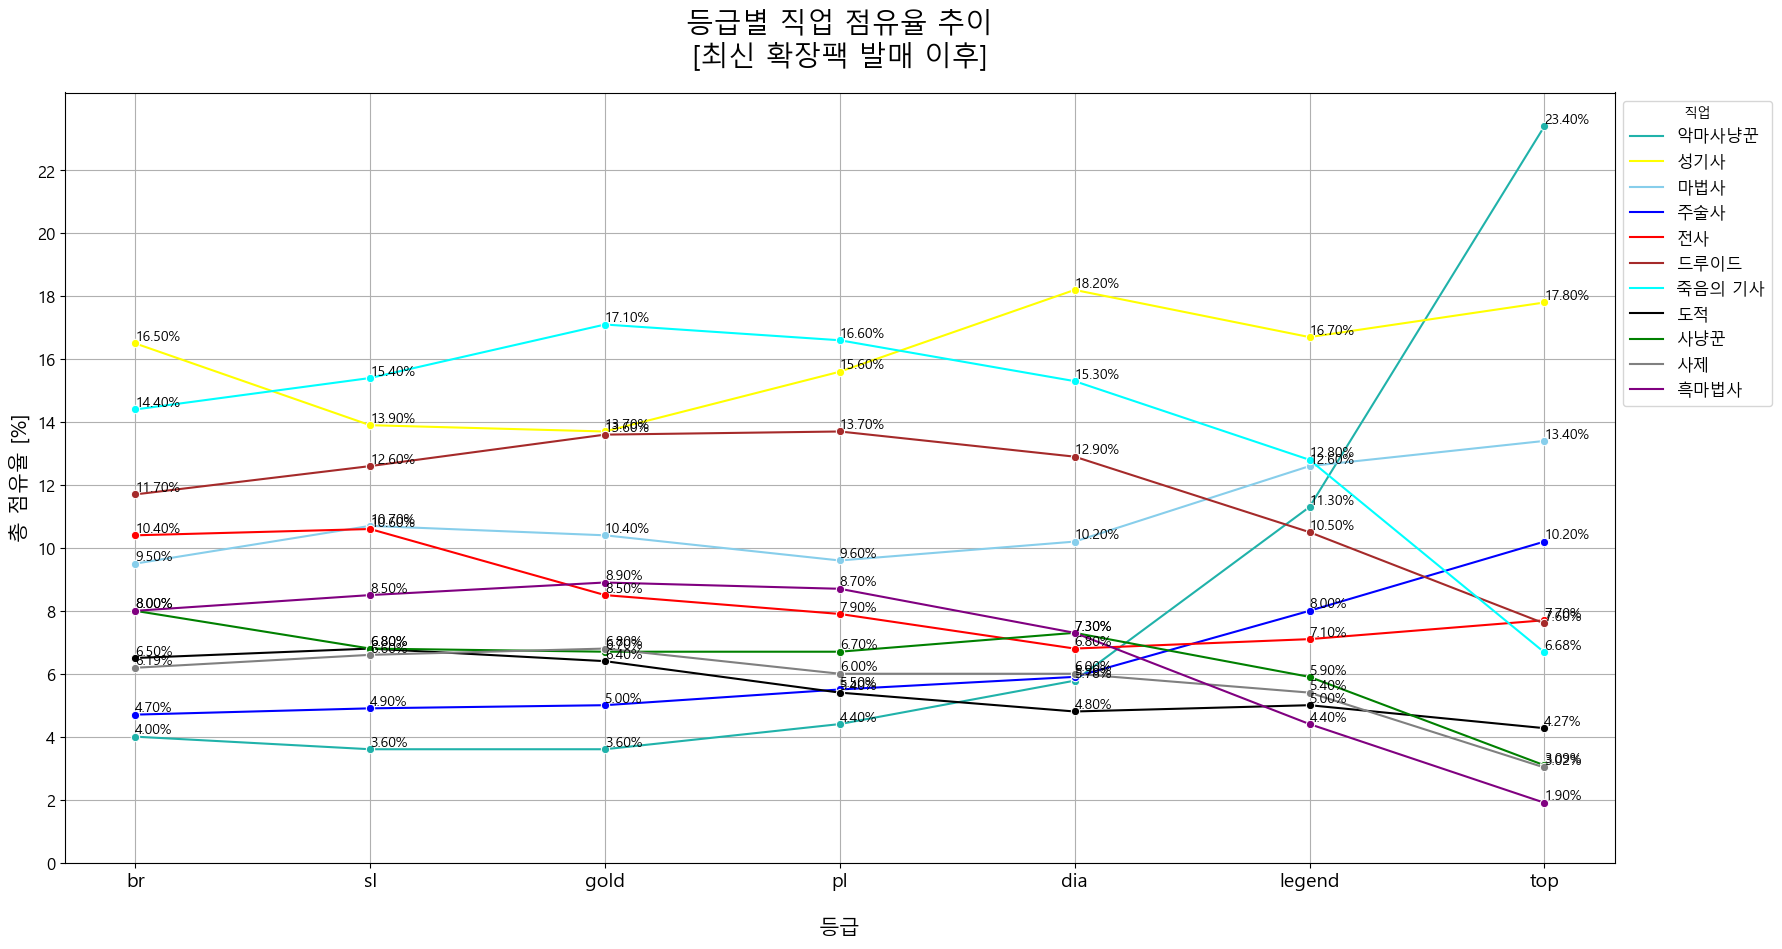

In [58]:
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Winrate'] = data['Winrate'].str.rstrip('%').astype('float')
    data['Popular'] = data['Popular'].str.rstrip('%').astype('float')
    data['Games'] = data['Games'].str.replace(',', '').astype('int')
    return data

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
filepaths = {
    'br': os.path.join(current_directory, 'br', './hs_meta.csv'),
    'sl': os.path.join(current_directory, 'sl', './hs_meta.csv'),
    'gold': os.path.join(current_directory, 'gold', './hs_meta.csv'),
    'pl': os.path.join(current_directory, 'pl', './hs_meta.csv'),
    'dia': os.path.join(current_directory, 'dia', './hs_meta.csv'),
    'legend': os.path.join(current_directory, 'legend', './hs_meta.csv'),
    'top': os.path.join(current_directory, '1000', './hs_meta.csv'),
}

# 데이터 불러오기 및 전처리
rank_data = {key: preprocess_data(value) for key, value in filepaths.items()}

# 파일명을 기반으로 Rank 열 추가
for rank, data in rank_data.items():
    data['Rank'] = rank

# 랭크별 데이터 합치기
all_rank_data = pd.concat(list(rank_data.values()))

# 랭크 및 직업별 Popular 합 구하기
rank_popular_by_hero = all_rank_data.groupby(['Rank', 'Hero'])[['Popular']].sum().reset_index()

# 직업별 상위 1000의 Popular 값에 따라 정렬
sorted_heroes = rank_popular_by_hero[rank_popular_by_hero['Rank'] == 'top'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 랭크 순서 정의
rank_order = ['br', 'sl', 'gold', 'pl', 'dia', 'legend', 'top']

# 랭크를 범주형 데이터로 변환하여 순서를 지정
rank_popular_by_hero['Rank'] = pd.Categorical(rank_popular_by_hero['Rank'], categories=rank_order, ordered=True)

# 직업별 상위 1000의 Popular 값에 따라 정렬
sorted_heroes = rank_popular_by_hero[rank_popular_by_hero['Rank'] == 'top'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 시각화
plt.figure(figsize=(20, 10))
sns.lineplot(data=rank_popular_by_hero, x='Rank', y='Popular', hue='Hero', marker='o', palette=hero_color, hue_order=sorted_heroes)

# 각 직업별 총 점유율 값을 선에 표시
for index, row in rank_popular_by_hero.iterrows():
    plt.text(row['Rank'], row['Popular'], f"{row['Popular']:.2f}%", color='black', fontsize=10, ha='left', va='bottom')

plt.title('등급별 직업 점유율 추이\n[최신 확장팩 발매 이후]', pad=20, fontsize=20)
plt.xlabel('등급', labelpad=20, fontsize=15)
plt.ylabel('총 점유율 [%]', fontsize=15)
plt.legend(title='직업', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# 축 설정
plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 24, 2), fontsize=12)
plt.grid(True)

plt.show()
